# Importing tensorflow

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

# Mounting the drive


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Importing libraries & JSON file

In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,LSTM,MaxPool2D,BatchNormalization,GRU
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.regularizers import l1_l2,l2

with open('/content/drive/MyDrive/ME_781_Adi/gtzan_mfcc.json', "r") as file:
    data = json.load(file) #Load MFCC dataset from JSON file

# convert lists to numpy arrays
X = np.array(data["mfcc"]) #Load MFCCs 
y = np.array(data["labels"]) #Load corresponding genre names



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) #Splitting data into random training and test sets


# Model (LSTM) Initialization
- Adding LSTM layers
- Activation Function

In [4]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.05, patience=5) #Reduce learning rate when a metric has stopped improving

model = Sequential() #Initializing a sequential model

model.add(LSTM(128, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True)) #Add a Long Short-Term Memory layer
model.add(LSTM(128)) #Add a Long Short-Term Memory layer

model.add(Dense(64, activation='relu',kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network

model.add(Dense(10, activation = "softmax")) #Add a densely connected output layer to the neural network

## Optimizing the model
- Adam Optimizer

In [5]:
optimiser = Adam(learning_rate=0.0001) #Initializes Adam optimizer for training
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Configures the model for training

### Printing Model Summary

In [6]:
model.summary() #Prints a string summary of the network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 130, 128)          72704     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 217,354
Trainable params: 217,354
Non-trainable params: 0
_________________________________________________________________


# Fitting the model

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40,verbose=2,callbacks=[rlrop]) #Trains the model for a fixed number of epochs

Epoch 1/40
282/282 - 80s - loss: 1.8885 - accuracy: 0.3516 - val_loss: 1.5237 - val_accuracy: 0.4570 - lr: 1.0000e-04 - 80s/epoch - 283ms/step
Epoch 2/40
282/282 - 75s - loss: 1.3549 - accuracy: 0.5133 - val_loss: 1.2757 - val_accuracy: 0.5480 - lr: 1.0000e-04 - 75s/epoch - 267ms/step
Epoch 3/40
282/282 - 75s - loss: 1.1561 - accuracy: 0.5853 - val_loss: 1.1443 - val_accuracy: 0.5960 - lr: 1.0000e-04 - 75s/epoch - 268ms/step
Epoch 4/40
282/282 - 76s - loss: 1.0380 - accuracy: 0.6338 - val_loss: 1.0530 - val_accuracy: 0.6200 - lr: 1.0000e-04 - 76s/epoch - 268ms/step
Epoch 5/40
282/282 - 75s - loss: 0.9617 - accuracy: 0.6666 - val_loss: 1.0192 - val_accuracy: 0.6510 - lr: 1.0000e-04 - 75s/epoch - 267ms/step
Epoch 6/40
282/282 - 75s - loss: 0.8759 - accuracy: 0.6986 - val_loss: 0.9557 - val_accuracy: 0.6620 - lr: 1.0000e-04 - 75s/epoch - 267ms/step
Epoch 7/40
282/282 - 76s - loss: 0.8054 - accuracy: 0.7220 - val_loss: 0.8897 - val_accuracy: 0.6840 - lr: 1.0000e-04 - 76s/epoch - 268ms/step

## Model plots

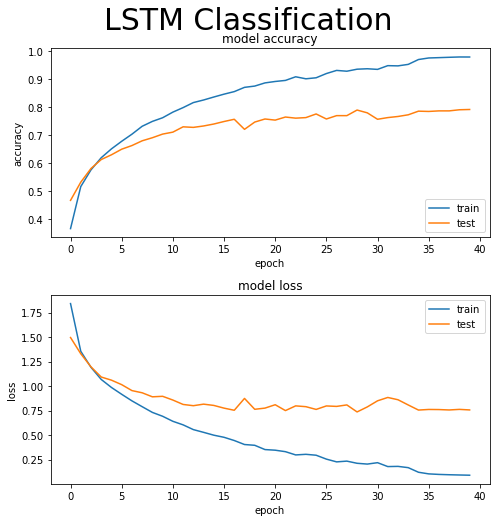

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7)) #Setting plot dimensions

#Plotting training and test accuracy of model
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Plotting training and test loss of model
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('LSTM Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

## Model Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
labelNames = ['pop','metal','disco','blues','reggae','classical','rock','hiphop','country','jazz']
predictions = model.predict(X_test, batch_size=32) #Use model to predict on the test data

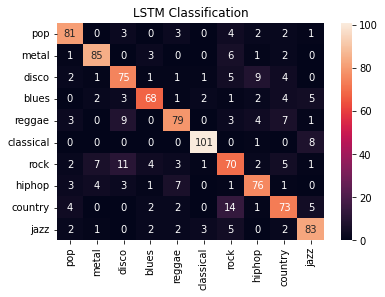

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1)) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames) #Plot confusion matrix as a heatmap
plt.title('LSTM Classification');

Just Printing the Test Accuracy for clarity!

In [12]:
  # evaluate model on test set
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print('\nTest accuracy:', test_acc)

32/32 - 2s - loss: 0.7231 - accuracy: 0.7850 - 2s/epoch - 75ms/step

Test accuracy: 0.7850000262260437
